<a href="https://colab.research.google.com/github/ah20776/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
np.set_printoptions(precision = 3)
column_names = list(range(0,101))
print(column_names)
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv',names=column_names)
df= data.copy()
df

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-7.86,99.00,99.00,

In [3]:
df.replace(99,  np.nan, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,37.0,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,

In [4]:
df.drop(0, axis=1, inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.

In [5]:
x=[]
for i in df.columns:
  x.append(df[i].mean())
#  max_value = max(x)
print(x.index(max(x)))
print("best joke  : ",x.index(max(x)),"  rating : ",max(x))
print("worst joke : ",x.index(min(x)),"  rating : ", min(x))

49
best joke  :  49   rating :  3.6650848950824937
worst joke :  57   rating :  -3.8338796373689923


In [6]:
df2 = df.copy()
print(df)
arr = df.values
print(arr.shape)

        1     2     3     4     5     6    ...   95    96    97    98    99    100
0     -7.82  8.79 -9.66 -8.16 -7.52 -8.50  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      4.08 -0.29  6.36  4.37 -2.38 -9.66  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       NaN   NaN   NaN   NaN  9.03  9.27  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       NaN  8.35   NaN   NaN  1.80  8.16  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      8.50  4.61 -4.17 -5.39  1.36  1.60  ...  5.73  1.55  3.11  6.55  1.80  1.60
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  0.44  7.43  9.08  2.33  3.20  6.75  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979  9.13 -8.16  8.59  9.08  0.87 -8.93  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   NaN   NaN   NaN   NaN -7.77   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   NaN   NaN   NaN   NaN -9.71   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982  2.43  2.67 -3.98  4.27 -2.28  7.33  ...   NaN   NaN   NaN   NaN   NaN   NaN

[24

In [7]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!= np.nan) #all values that are not 99 are taken as 
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

new_arr, idx = replace(arr, 0.1)
print(new_arr,idx)

[[-7.82  8.79 -9.66 ...   nan 99.     nan]
 [ 4.08 -0.29  6.36 ... 99.   -4.32  1.07]
 [  nan   nan   nan ...   nan 99.     nan]
 ...
 [99.     nan   nan ...   nan   nan 99.  ]
 [  nan   nan 99.   ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]] (array([ 5826, 22552, 24122, ..., 21462,  9734, 19339]), array([30, 95, 79, ..., 17, 26, 18]))


In [8]:
arr[idx[0][0], idx[1][0]]


-8.25

In [9]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [10]:
data = df
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [11]:
latent_item_features


array([[5.622e-01, 5.696e-01],
       [7.496e-01, 8.401e-01],
       [7.197e-01, 5.336e-02],
       [9.959e-01, 4.602e-01],
       [3.501e-02, 3.084e-01],
       [8.915e-01, 3.419e-01],
       [5.973e-01, 9.589e-01],
       [2.403e-01, 1.942e-01],
       [1.907e-01, 5.575e-01],
       [6.271e-01, 8.614e-01],
       [2.668e-01, 6.638e-01],
       [3.032e-01, 7.830e-01],
       [7.596e-01, 7.305e-01],
       [3.256e-01, 8.640e-02],
       [3.508e-01, 3.029e-01],
       [8.227e-01, 7.300e-01],
       [3.795e-02, 7.374e-01],
       [1.697e-01, 6.222e-01],
       [3.001e-01, 7.672e-01],
       [1.103e-01, 2.533e-01],
       [5.989e-01, 5.147e-03],
       [4.456e-01, 6.201e-01],
       [2.880e-01, 8.406e-01],
       [8.882e-01, 5.106e-01],
       [8.948e-01, 2.053e-01],
       [2.775e-01, 8.397e-02],
       [7.410e-01, 9.235e-01],
       [4.945e-01, 4.930e-01],
       [5.301e-01, 8.072e-01],
       [9.295e-01, 5.950e-01],
       [3.620e-02, 2.821e-01],
       [6.507e-02, 5.019e-01],
       [

In [12]:
latent_user_preferences

array([[0.752, 0.983],
       [0.447, 0.878],
       [0.985, 0.318],
       ...,
       [0.792, 0.511],
       [0.84 , 0.785],
       [0.473, 0.978]])

In [13]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/20:	MSE=26.200602


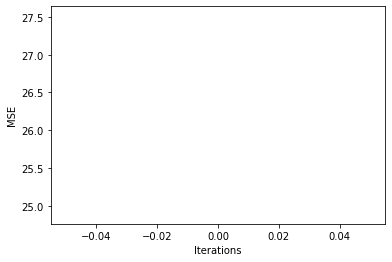

In [14]:
num_iter = 20
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [15]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[5.550e-01, 1.163e-01, 1.951e-01, ..., 1.122e+00, 2.494e-01,
        1.599e+00],
       [2.167e+00, 2.309e+00, 2.110e+00, ..., 2.121e+00, 1.716e+00,
        2.284e+00],
       [2.951e+00, 2.316e+00, 2.271e+00, ..., 3.898e+00, 2.005e+00,
        4.881e+00],
       ...,
       [3.191e-01, 5.309e-04, 6.398e-02, ..., 7.257e-01, 1.168e-01,
        1.061e+00],
       [1.191e+00, 8.542e-01, 8.581e-01, ..., 1.670e+00, 7.769e-01,
        2.140e+00],
       [3.353e+00, 3.260e+00, 3.038e+00, ..., 3.663e+00, 2.530e+00,
        4.202e+00]])

In [16]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 0.5549894026081903)","(8.79, 0.11632235758197904)","(-9.66, 0.19513176274998328)","(-8.16, -1.3332553874712403)","(-7.52, 0.3301846581055893)","(-8.5, 1.5487954489755305)","(-9.85, -0.5573244626329882)","(4.17, -0.7602657738159649)","(-8.98, -0.8531522741467651)","(-4.76, 0.7363978756910643)","(-8.5, 1.5595036488673997)","(-6.75, 1.3699980402728926)","(-7.18, -1.732490339140676)","(8.45, 1.2986977732176292)","(-7.18, -1.8216707238962264)","(-7.52, -3.087910187886349)","(-7.43, -0.9624506217717641)","(-9.81, -0.824936797655618)","(-9.85, 0.0629735530639717)","(-9.85, -0.9675133152142674)","(-9.37, 2.063065936972677)","(1.5, 0.5972676962571599)","(-4.37, -0.19416212161548338)","(-9.81, -1.8173536562649553)","(-8.5, 0.18565045327219457)","(1.12, 1.2311733876774555)","(7.82, 3.0672698439859123)","(2.86, 1.312227084777106)","(9.13, 2.8468917949292045)","(-7.43, -0.5922393526792809)","(2.14, 2.1448443640630694)","(-4.08, 2.984571169152752)","(-9.08, -1.3910590220872874)","(7.82, 0.7898126169367077)","(5.05, 2.8073821924381415)","(4.95, 3.088538586884769)","(-9.17, -1.5887965418391456)","(-8.4, 0.8087525272832157)","(-8.4, 0.9844458490303277)","(-8.4, 0.7488839007299151)",...,"(8.59, 2.269673740867904)","(3.59, 2.7090508665058186)","(-6.84, 0.03170706472511149)","(-9.03, -1.0726168614182918)","(2.82, 2.226525056295507)","(-1.36, 2.335504105116849)","(-9.08, -1.1986897795392297)","(8.3, 2.413149986790343)","(5.68, 2.482355800574879)","(-4.81, 0.22487505367453706)","(nan, -0.21032469513276006)","(nan, 2.7189081685367307)","(nan, 1.5644039805449033)","(nan, -0.7835528817174449)","(nan, 0.2024905547194749)","(nan, 2.4429757137731443)","(nan, 1.0545488661366713)","(-9.42, 1.9793069253844537)","(nan, 0.7763318208499054)","(nan, 1.6874873825781596)","(nan, 1.9355628642490421)","(-7.72, 1.1462402652025123)","(nan, 2.123560549029896)","(nan, 0.9719173087915957)","(nan, 1.2604710766488698)","(nan, 0.424598223890693)","(nan, 1.9291364934811839)","(nan, 2.066390622171718)","(nan, 3.3576579647101186)","(nan, 0.8357496658934838)","(2.82, 1.8783612132317289)","(nan, 1.2779659444934717)","(nan, 2.4812954453161984)","(nan, 1.159239097500632)","(nan, 1.0574346763193154)","(nan, 1.4791625750537538)","(-5.63, 1.4976113097878907)","(nan, 1.1215334096173695)","(nan, 0.2493547702882453)","(nan, 1.599127853253964)"
1,"(4.08, 2.1673596187254764)","(-0.29, 2.3093201113321355)","(6.36, 2.1102475393188698)","(4.37, 1.6718112182400304)","(-2.38, 1.7652497492280101)","(-9.66, 2.8455651812567013)","(-0.73, 1.4279358729997738)","(-5.34, 0.762649927018518)","(8.88, 1.9782998863102126)","(9.22, 2.424260918734442)","(6.75, 2.884540663836971)","(8.64, 3.1161572713577805)","(4.42, 0.4910949554586574)","(7.43, 3.163927494342504)","(4.56, 0.26088982189545257)","(-0.97, -0.15632748084059195)","(4.66, 0.8183282472066963)","(-0.68, 1.0955355565561067)","(3.3, 1.7771266417829172)","(-1.21, 1.551749235181971)","(0.87, 3.1061763834609555)","(8.64, 2.8037483606879094)","(8.35, 2.398327029119676)","(9.17, 1.4896221151763873)","(0.05, 2.7130450402212243)","(7.57, 3.054563679845785)","(4.71, 2.9360753087380496)","(0.87, 2.9346720641842254)","(-0.39, 2.861375335401979)","(6.99, 2.409618375304635)","(6.5, 3.0064142687579793)","(-0.92, 2.9912353006266)","(7.14, 1.8322121686991601)","(9.03, 2.866957673712089)","(-1.8, 3.103862903080107)","(0.73, 2.8320494395730833)","(7.09, 1.5458449205584734)","(3.4, 2.798522274721897)","(-0.87, 2.984607495247588)","(7.91, 2.880758138777793)",...,"(-6.7, 3.233434709448703)","(-3.35, 3.1597967507072027)","(-9.03, 2.5415196975960326)","(4.47, 2.000392768389815)","(4.08, 3.0345934808277395)","(-3.83, 3.0598104250601375)","(8.74, 2.0226481109838095)","(1.12, 2.9980700655508064)","(0.78, 3.0684532948499688)","(7.

###Movie Data###


In [17]:
!git clone https://github.com/ah20776/CE888.git

fatal: destination path 'CE888' already exists and is not an empty directory.


In [39]:
m_data = pd.read_excel('/content/CE888/Lab_4/movies_latent_factors.xlsx')
m_df= m_data.copy()
m_df

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9806,The Incredibles (2004),0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
96,10020,Beauty and the Beast (1991),1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
97,36657,X-Men (2000),0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790
98,36658,X2: X-Men United (2003),1.161006,-0.715613,0.712633,-0.688808,-0.717785,-1.007047,-0.267268,-0.802322,-0.249239,-0.540419,-0.291422,-0.240216,0.290714,-1.217250,-0.288130


In [40]:
id = m_df['Factor13'].argmax()

In [41]:
m_df.head(id + 1)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
6,38,Eternal Sunshine of the Spotless Mind (2004),-0.695539,1.771799,0.143646,0.244718,0.434222,-0.367995,-0.186841,-0.961435,0.240228,-0.474231,0.492446,-1.041901,-0.181657,0.479142,0.237458
7,63,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),-0.615623,1.390542,0.759321,-0.408655,-0.099375,-0.073539,-0.261833,-0.923701,0.073849,-0.041067,0.782604,-0.539200,0.290092,-0.229462,0.432006
8,77,Memento (2000),-1.443730,1.466671,-0.121894,-0.237937,-0.301010,-0.650094,-0.000577,-1.122585,-0.201654,-0.662704,0.247859,-0.429991,-0.032267,0.513381,0.505265
9,85,Raiders of the Lost Ark (Indiana Jones and the...,-1.241724,0.021130,0.489161,0.424584,-1.262253,1.190654,-0.606434,0.305721,1.438862,0.402682,0.438831,0.784948,-0.874375,-0.399984,-0.197686


In [48]:
m_df_Users = pd.read_excel("/content/CE888/Lab_4/movies_latent_factors.xlsx", sheet_name='Users')
m_df_Users

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
5,783,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
6,3878,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
7,768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
8,4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983
9,1882,-0.083093,-0.029160,0.013748,0.022716,-0.062732,-0.080670,-0.019723,0.013253,-0.091305,-0.090687,0.030638,-0.113364,-0.021325,0.181508,0.022357


In [59]:
m_user_factors= m_df_Users[(m_df_Users["User"] == 525)]
m_user_factors = m_user_factors.drop('User', axis=1)
m_user_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
20,-0.04029,0.014383,-0.098967,-0.018957,0.012388,0.035546,0.000903,0.012835,-0.02108,0.018742,-0.050483,-0.025394,0.034079,0.03833,-0.001341


In [60]:
movie_factors = m_df[(m_df["Movie ID"] == 3049)]
movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
movie_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
85,2.72372,0.745282,0.029587,-0.328153,0.685947,2.592889,3.457525,-0.78038,-0.219994,-1.313421,0.163827,0.573048,-0.324509,0.358344,0.128814


In [61]:
m_user_factors.values.dot(movie_factors.values.T)

array([[-0.042]])

In [53]:
user_factors= m_df_Users[(m_df_Users["User"] == 3048)]
user_factors = user_factors.drop('User', axis=1)
user_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
22,-0.320315,0.07829,-0.083182,-0.221577,-0.078184,-0.145306,-0.020166,0.124409,-0.063425,0.004726,0.009683,0.028016,-0.0181,-0.128452,0.069972


In [52]:
movie_ids = [98, 155, 414, 857, 672]
ratings = {}
for id in movie_ids:
  movie_factors = m_df[(m_df["Movie ID"] == id)]
  movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
  ratings[id] = movie_factors.values.dot(movie_factors.values.T)
ratings

{98: array([[9.642]]),
 155: array([[21.477]]),
 414: array([[20.656]]),
 672: array([[34.855]]),
 857: array([[7.021]])}